In [2]:
import sys

sys.path.append('../compare')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from matplotlib.gridspec import GridSpec
from tqdm import tqdm
from utils import *
import pandas as pd
import os

/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/numba/core/types/__init__.py:108: FutureWarning: In the future `np.long` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
  long_ = _make_signed(np.long)
/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/numba/core/types/__init__.py:108: FutureWarning: In the future `np.long` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
  long_ = _make_signed(np.long)


## default parameters

In [3]:
plt.rcParams['font.size'] = '5'
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['svg.fonttype'] = 'none'

cm = 1/2.54
# 每次调用font dict
fontdict = dict(fontsize=7, family='Arial')

# red
red = '#A9373B'
lred = '#CB4A49'
yellow = '#E8CA7D'
lyellow=  '#F7D7C5'

blue = '#2369BD'
lblue = '#5C93C5'
purple='#C4BCDD'
lpurple = '#BDD2E2'

# Stimulus dependent parameters

In [18]:
mega = []

exps = ['benchmark', 'compare', 'range','120target']

for exp in exps:

    add = '../results/%s' % exp
    subs = os.listdir(add)

    for sub in subs:
        subFolder = add+os.sep+sub
        if os.path.exists(subFolder+os.sep+'NaB_info.csv'):
            f = pd.read_csv(subFolder+os.sep+'NaB_info.csv')
            mega.append(f)

mega = pd.concat(mega, ignore_index=True, axis=0)
mega.loc[mega.f==60,'ubSNR'] = mega.loc[mega.f==59,'ubSNR']
mega.tail()

,Unnamed: 0,f,ubSNR,ubrate,sPower,nPower,X,exp,subject,ubINFO,tag
16370,120,120.0,0.722330,52.567697,2.288587e-06,3.109216e-06,3.051846e-06,120target,yts,54.116703,SSVEP
16371,121,121.0,0.761520,52.648354,3.485463e-07,4.416309e-07,4.331750e-07,120target,yts,54.116703,SSVEP
16372,122,122.0,0.811144,53.317718,2.580651e-07,3.087753e-07,3.034047e-07,120target,yts,54.116703,SSVEP
16373,123,123.0,0.842168,53.420166,2.284593e-07,2.663426e-07,2.624134e-07,120target,yts,54.116703,SSVEP
16374,124,124.0,0.859925,54.116703,2.158529e-07,2.485587e-07,2.452995e-07,120target,yts,54.116703,SSVEP


## (a) Stimulus bandwidth

In [19]:
aveMega = mega.groupby(by=['f','exp','tag'],as_index=False).mean()

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_76597/2483274481.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aveMega = mega.groupby(by=['f','exp','tag'],as_index=False).mean()


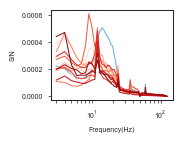

In [25]:
sns.set_theme(style='ticks', font='Arial', rc={"lines.linewidth": 0.75, 'font.size': 5, 'legend.fontsize': 5,
              'legend.title_fontsize': 5, 'axes.labelsize': 5, 'xtick.labelsize': 5, 'ytick.labelsize': 5, })

fig, (ax1) = plt.subplots(1, 1, figsize=(4*cm, 3*cm))

sns.lineplot(data=aveMega[(aveMega.f > 2) & (aveMega.exp.isin(['120target',]))],
             x='f', y='sPower', hue='exp', ax=ax1, style='tag', legend=False, palette='Blues')

sns.lineplot(data=mega[(mega.f > 2) & (mega.exp.isin(['120target', ]))],
             x='f', y='nPower', hue='subject', ax=ax1, style='tag', legend=False, palette='Reds')

# sns.lineplot(data=aveMega[(aveMega.f > 2) & (aveMega.exp.isin(['compare']))],
#              x='f', y='ubSNR', hue='exp', ax=ax1, style='tag', legend=True,palette=[red])

ax1.set_ylabel('S/N')
ax1.set_xlabel('Frequency(Hz)')

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='both')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.set_xscale('log')

plt.savefig('../images/mainFig4/fig4a1.png',dpi=400,bbox_inches='tight')
plt.savefig('../images/mainFig4/fig4a1.svg',dpi=400,bbox_inches='tight')

In [191]:
subList = ['yangyuxing', 'jingyi', 'xuwenjia',
        'fanzixiao', 'wangchaoying', 'lijiayang', 
        'libowen', 'zhouyuqing', 'miaoyining', 
        'yaofeifan','chenyuzhen','shixinge',
        'suxiaohan','quyuxin','zhaoxinyu',
        'jiaqi', 'hanyue', 'weiyichen','liangfangshuo','sunjinnan']

In [22]:
compare = []
add = '../results/compare'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'NaB_info.csv'):
        f = pd.read_csv(subFolder+os.sep+'NaB_info.csv')
        compare.append(f)
    
compare = pd.concat(compare, ignore_index=True,axis=0)

compare = compare[(compare.subject.isin(subList))]
compare.tail()

,Unnamed: 0,f,ubSNR,ubrate,sPower,nPower,X,exp,subject,ubINFO,tag
7495,295,120.833333,0.258569,51.751405,1.519010e-16,7.019500e-16,8.538509e-16,compare,yaofeifan,51.749263,SSVEP
7496,296,121.666667,0.272673,50.996568,1.558144e-16,6.983567e-16,8.541711e-16,compare,yaofeifan,51.749263,SSVEP
7497,297,122.500000,0.288227,51.739647,1.588992e-16,6.780798e-16,8.369790e-16,compare,yaofeifan,51.749263,SSVEP
7498,298,123.333333,0.269661,50.983126,1.377370e-16,6.102316e-16,7.479686e-16,compare,yaofeifan,51.749263,SSVEP
7499,299,124.166667,0.226925,51.749263,1.532090e-16,7.487650e-16,9.019740e-16,compare,yaofeifan,51.749263,SSVEP


## (b) Strength

### (b1)

In [76]:
strength = []

exps = ['fullcontrast','halfcontrast']

for exp in exps:

    add = '../results/%s' % exp
    subs = os.listdir(add)

    for sub in subs:
        subFolder = add+os.sep+sub
        if os.path.exists(subFolder+os.sep+'NaB_info.csv'):
            f = pd.read_csv(subFolder+os.sep+'NaB_info.csv')
            strength.append(f)

strength = pd.concat(strength, ignore_index=True, axis=0)
aveStrength = strength.groupby(by=['f','exp','tag'],as_index=False).mean()
aveStrength.tail()

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_98401/23912670.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aveStrength = strength.groupby(by=['f','exp','tag'],as_index=False).mean()


,f,exp,tag,Unnamed: 0,ubSNR,ubrate,sPower,nPower,X,ubINFO
245,122.0,halfcontrast,SSVEP,122.0,0.121027,8.200147,0.000021,0.000206,0.000226,8.251086
246,123.0,fullcontrast,SSVEP,123.0,0.131324,16.180470,0.000027,0.000251,0.000278,16.649875
247,123.0,halfcontrast,SSVEP,123.0,0.113653,7.935274,0.000019,0.000186,0.000205,8.251086
248,124.0,fullcontrast,SSVEP,124.0,0.136420,16.649875,0.000027,0.000242,0.000269,16.649875
249,124.0,halfcontrast,SSVEP,124.0,0.112357,8.251086,0.000018,0.000179,0.000196,8.251086


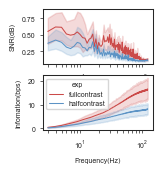

In [79]:
sns.set_theme(style='ticks', font='Arial', rc={"lines.linewidth": 0.75, 'font.size': 5, 'legend.fontsize': 5,
              'legend.title_fontsize': 5, 'axes.labelsize': 5, 'xtick.labelsize': 5, 'ytick.labelsize': 5, })

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(3.6*cm, 4*cm))

sns.lineplot(data=strength[(strength.f > 2)],
             x='f', y='ubSNR', hue='exp', ax=ax1, legend=False, palette=[lred,lblue],)

sns.lineplot(data=strength[(strength.f > 2)],
             x='f', y='ubrate', hue='exp', ax=ax2, legend=True, palette=[lred, lblue],)

ax1.set_ylabel('SNR(dB)')
ax2.set_ylabel('Infomation(bps)')

ax1.set_xlabel('Frequency(Hz)')
ax2.set_xlabel('Frequency(Hz)')

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='both')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.set_xscale('log')

plt.savefig('../images/mainFig4/fig4b1.png',dpi=400,bbox_inches='tight')
plt.savefig('../images/mainFig4/fig4b1.svg',dpi=400,bbox_inches='tight')

### (b2)

In [81]:
ttrfs = []
ftrfs = []

exps = ['fullcontrast', 'halfcontrast']

for exp in exps:
    add = '../results/%s' % exp
    subs = os.listdir(add)
    for sub in subs:
        subFolder = add+os.sep+sub
        if os.path.exists(subFolder+os.sep+'ttrf.csv'):
            f = pd.read_csv(subFolder+os.sep+'ttrf.csv')
            ttrfs.append(f)

            f = pd.read_csv(subFolder+os.sep+'ftrf.csv')
            ftrfs.append(f)

ttrfs = pd.concat(ttrfs, ignore_index=True, axis=0)
ftrfs = pd.concat(ftrfs, ignore_index=True, axis=0)

ttrfs.tail()

,Unnamed: 0,tau,band,trf,tag,subject,exp
3775,121,0.484,0,-1.168010,SSVEP,S12,halfcontrast
3776,122,0.488,0,-1.472895,SSVEP,S12,halfcontrast
3777,123,0.492,0,-1.623133,SSVEP,S12,halfcontrast
3778,124,0.496,0,-1.551847,SSVEP,S12,halfcontrast
3779,125,0.500,0,-1.894364,SSVEP,S12,halfcontrast


In [82]:
aveTrfs = ttrfs.groupby(by=['exp', 'tau'], as_index=False).mean()

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_98401/2566098655.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aveTrfs = ttrfs.groupby(by=['exp', 'tau'], as_index=False).mean()


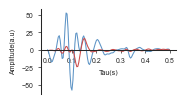

In [93]:

sns.set_theme(style='ticks', font='Arial', rc={"lines.linewidth": 0.75, 'font.size': 5, 'legend.fontsize': 5,
              'legend.title_fontsize': 5, 'axes.labelsize': 5, 'xtick.labelsize': 5, 'ytick.labelsize': 5, })

fig,(ax1) = plt.subplots(1,1,figsize=(4.4*cm,2.8*cm))

sns.lineplot(data=aveTrfs,
             x='tau', y='trf', hue='exp', ax=ax1, legend=False, palette=[lblue, lred])

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='both')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.spines['bottom'].set_position(('data', 0))
    ax.set_xlabel('Tau(s)')
    ax.set_ylabel('Amplitude(a.u)')

sns.despine()

plt.savefig('../images/mainFig4/fig4c1.png',dpi=400,bbox_inches='tight')
plt.savefig('../images/mainFig4/fig4c1.svg',dpi=400,bbox_inches='tight')

## (C) gamma

In [94]:
ttrfs = []
ftrfs = []

exps = ['gamma','sweepMEG']

for exp in exps:
    add = '../results/%s' % exp
    subs = os.listdir(add)
    for sub in subs:
        subFolder = add+os.sep+sub
        if os.path.exists(subFolder+os.sep+'ttrf.csv'):
            f = pd.read_csv(subFolder+os.sep+'ttrf.csv')
            ttrfs.append(f)

            f = pd.read_csv(subFolder+os.sep+'ftrf.csv')
            ftrfs.append(f)

ttrfs = pd.concat(ttrfs, ignore_index=True, axis=0)
ftrfs = pd.concat(ftrfs, ignore_index=True, axis=0)

ftrfs.tail()

,Unnamed: 0,f,amp,subject,tag,exp
1822,58,115.079365,2.075564,S12,SSVEP,fullcontrast
1823,59,117.063492,2.386294,S12,SSVEP,fullcontrast
1824,60,119.047619,2.300714,S12,SSVEP,fullcontrast
1825,61,121.031746,2.349364,S12,SSVEP,fullcontrast
1826,62,123.015873,1.968930,S12,SSVEP,fullcontrast


In [107]:
tau = ttrfs.tau.unique()
echo = ttrfs[(ttrfs.subject == 'S5') & (ttrfs.exp == 'gamma')].trf.to_numpy()
echo1 = lowFilter(echo,srate=250,band=[40,100])
echo2 = lowFilter(echo,srate=250,band=[8,20])

ssvepgamma = ttrfs[ttrfs.subject=='MSZhengnan1'].trf.to_numpy()
ssvepgamma1 = lowFilter(ssvepgamma,srate=250,band=[40,100])
ssvepgamma2 = lowFilter(ssvepgamma,srate=250,band=[8,20])

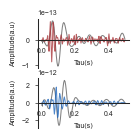

In [108]:
sns.set_theme(style='ticks', font='Arial', rc={"lines.linewidth": 0.75, 'font.size': 5, 'legend.fontsize': 5,
              'legend.title_fontsize': 5, 'axes.labelsize': 5, 'xtick.labelsize': 5, 'ytick.labelsize': 5, })

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(3*cm,3.6*cm))

ax1.plot(tau, echo2, color='gray')
ax1.plot(tau,echo1,color=red,alpha=0.8)

ax2.plot(tau, ssvepgamma2, color='gray')
ax2.plot(tau,ssvepgamma1,color=blue,alpha=0.8)

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='both')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.spines['bottom'].set_position(('data', 0))
    ax.set_xlabel('Tau(s)')
    ax.set_ylabel('Amplitude(a.u)')


sns.despine()

plt.savefig('../images/mainFig4/fig4c1.png',dpi=400,bbox_inches='tight')
plt.savefig('../images/mainFig4/fig4c1.svg',dpi=400,bbox_inches='tight')

In [265]:
gamma = []

exps = ['sweepMEG']

for exp in exps:

    add = '../results/%s' % exp
    subs = os.listdir(add)

    for sub in subs:
        subFolder = add+os.sep+sub
        if os.path.exists(subFolder+os.sep+'SxN.csv'):
            f = pd.read_csv(subFolder+os.sep+'SxN.csv')
            gamma.append(f)

gamma = pd.concat(gamma, ignore_index=True, axis=0)
gamma.tail()

,Unnamed: 0,label,f,psd,component,tag,subject,exp
624370,69370,33,124.8,3.301390e-30,noise,SSVEP,MSMojiayi1,sweepMEG
624371,69371,34,124.8,2.616295e-30,noise,SSVEP,MSMojiayi1,sweepMEG
624372,69372,35,124.8,2.748500e-30,noise,SSVEP,MSMojiayi1,sweepMEG
624373,69373,36,124.8,3.247862e-30,noise,SSVEP,MSMojiayi1,sweepMEG
624374,69374,37,124.8,2.484046e-30,noise,SSVEP,MSMojiayi1,sweepMEG


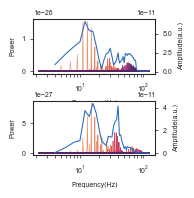

In [296]:
sns.set_theme(style='ticks', font='Arial', rc={"lines.linewidth": 0.75, 'font.size': 5, 'legend.fontsize': 5,
              'legend.title_fontsize': 5, 'axes.labelsize': 5, 'xtick.labelsize': 5, 'ytick.labelsize': 5, })
fig,(ax1,ax2)= plt.subplots(2,1,figsize=(4*cm,4.5*cm))

plt.subplots_adjust(hspace=0.5)

ax11 = ax1.twinx()
ax22 = ax2.twinx()

sns.lineplot(data=gamma[(gamma.subject.isin(['MSYangpengyu1'])) & (gamma.f > 2) & (
    (gamma.component == 'sig'))], x='f', y='psd', hue='label', ax=ax1, lw=0.5, legend=False, palette='flare')

sns.lineplot(data=ftrfs[(ftrfs.subject.isin(['MSYangpengyu1']))&(ftrfs.f>2)],x='f',y='amp',ax=ax11,color=blue)


sns.lineplot(data=gamma[(gamma.subject.isin(['MSZhengnan1'])) & (gamma.f > 2) & (
    (gamma.component == 'sig'))], x='f', y='psd', hue='label', ax=ax2, lw=0.5, legend=False, palette='flare')

sns.lineplot(data=ftrfs[(ftrfs.subject.isin(['MSZhengnan1'])) & (
    ftrfs.f > 2)], x='f', y='amp', ax=ax22, color=blue)


ax1.set_xlabel('Frequency(Hz)')
ax11.set_xlabel('Frequency(Hz)')

ax2.set_xlabel('Frequency(Hz)')
ax22.set_xlabel('Frequency(Hz)')

ax1.set_ylabel('Power')
ax11.set_ylabel('Amplitude(a.u.)')

ax2.set_ylabel('Power')
ax22.set_ylabel('Amplitude(a.u.)')

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='both')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.set_xscale('log')


plt.savefig('../images/mainFig4/fig4c2.png',dpi=400,bbox_inches='tight')
plt.savefig('../images/mainFig4/fig4c2.svg',dpi=400,bbox_inches='tight')

In [126]:
ttrfs = []
ftrfs = []

exps = ['simuEEG','simuMEG']

for exp in exps:
    add = '../results/%s' % exp
    subs = os.listdir(add)
    for sub in subs:
        subFolder = add+os.sep+sub
        if os.path.exists(subFolder+os.sep+'ttrf.csv'):
            f = pd.read_csv(subFolder+os.sep+'ttrf.csv')
            ttrfs.append(f)

            f = pd.read_csv(subFolder+os.sep+'ftrf.csv')
            ftrfs.append(f)

ttrfs = pd.concat(ttrfs, ignore_index=True, axis=0)
ftrfs = pd.concat(ftrfs, ignore_index=True, axis=0)

ttrfs["subject"] = ttrfs["subject"].str[2:]
ftrfs["subject"] = ftrfs["subject"].str[2:]

ftrfs.tail()


,Unnamed: 0,f,amp,subject,tag,exp
2011,58,115.079365,7.610282e-14,Maqiyuan,SSVEP,simuMEG
2012,59,117.063492,7.728432e-14,Maqiyuan,SSVEP,simuMEG
2013,60,119.047619,7.529060e-14,Maqiyuan,SSVEP,simuMEG
2014,61,121.031746,7.417647e-14,Maqiyuan,SSVEP,simuMEG
2015,62,123.015873,7.715015e-14,Maqiyuan,SSVEP,simuMEG


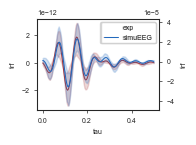

In [127]:
sns.set_theme(style='ticks', font='Arial', rc={"lines.linewidth": 0.75, 'font.size': 5, 'legend.fontsize': 5,
              'legend.title_fontsize': 5, 'axes.labelsize': 5, 'xtick.labelsize': 5, 'ytick.labelsize': 5, })
fig, (ax1) = plt.subplots(1, 1, figsize=(4*cm, 3*cm))

ax2 = ax1.twinx()
sns.lineplot(data=ttrfs[(ttrfs.exp.isin(['simuMEG']) & (ttrfs.subject.isin(['Chenjingjing', 'Daibo', 'Wangdongbing', 'Huangfeixiang','Lixiang'])))], x='tau', y='trf', hue='exp', ax=ax1, palette=[red])
sns.lineplot(data=ttrfs[(ttrfs.exp.isin(['simuEEG']) & (ttrfs.subject.isin(['Chenjingjing', 'Daibo','Wangdongbing', 'Huangfeixiang', 'Lixiang'])))], x='tau', y='trf', hue='exp', ax=ax2, palette=[blue])

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='both')
    plt.setp(ax.spines.values(), linewidth=0.75)

plt.savefig('../images/mainFig4/fig4c3.png',dpi=400,bbox_inches='tight')
plt.savefig('../images/mainFig4/fig4c3.svg',dpi=400,bbox_inches='tight')

# Participant related parameters

## (d) Filtered signal

In [202]:
ttrfs = []
ftrfs = []

exp  = 'optimize'

add = '../results/%s' % exp
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    if os.path.exists(subFolder+os.sep+'ttrf.csv'):
        f = pd.read_csv(subFolder+os.sep+'ttrf.csv')
        ttrfs.append(f)

        f = pd.read_csv(subFolder+os.sep+'ftrf.csv')
        ftrfs.append(f)

ttrfs = pd.concat(ttrfs, ignore_index=True, axis=0)
ftrfs = pd.concat(ftrfs, ignore_index=True, axis=0)

ftrfs.tail()

,Unnamed: 0,f,amp,subject,tag
1696,58,115.079365,0.000838,yaofeifan,WN
1697,59,117.063492,0.000833,yaofeifan,WN
1698,60,119.047619,0.000885,yaofeifan,WN
1699,61,121.031746,0.000827,yaofeifan,WN
1700,62,123.015873,0.000836,yaofeifan,WN


In [203]:
alphaS = []

exps = ['compare']

for exp in exps:

    add = '../results/%s' % exp
    subs = os.listdir(add)

    for sub in subs:
        subFolder = add+os.sep+sub
        if os.path.exists(subFolder+os.sep+'SxN.csv'):
            f = pd.read_csv(subFolder+os.sep+'SxN.csv')
            alphaS.append(f)

alphaS = pd.concat(alphaS, ignore_index=True, axis=0)
alphaS = alphaS[alphaS.f>2]
alphaS.tail()

,Unnamed: 0,label,f,psd,component,tag,subject,exp
3149995,125995,76,124.761905,2.592695e-15,noise,SSVEP,yaofeifan,compare
3149996,125996,77,124.761905,5.668195e-16,noise,SSVEP,yaofeifan,compare
3149997,125997,78,124.761905,3.845840e-16,noise,SSVEP,yaofeifan,compare
3149998,125998,79,124.761905,1.424315e-15,noise,SSVEP,yaofeifan,compare
3149999,125999,80,124.761905,1.077744e-15,noise,SSVEP,yaofeifan,compare


/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_98401/2998914697.py:10: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=ttrfs[~(ttrfs.subject.isin(subs))], x='tau', y='trf', hue='subject',ax=ax1,legend=False,palette=['gray'],lw=0.2)
/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_98401/2998914697.py:13: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=ftrfs[~(ftrfs.subject.isin(subs))],


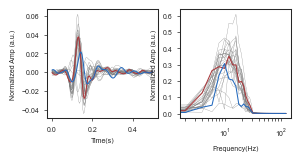

In [206]:
sns.set_theme(style='ticks', font='Arial', rc={"lines.linewidth": 0.75, 'font.size': 5, 'legend.fontsize': 5,
              'legend.title_fontsize': 5, 'axes.labelsize': 5, 'xtick.labelsize': 5, 'ytick.labelsize': 5, })

subs = ['sunjinnan', 'yangyuxing']

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8*cm,3.6*cm))

plt.subplots_adjust(wspace=0.2)

sns.lineplot(data=ttrfs[~(ttrfs.subject.isin(subs))], x='tau', y='trf', hue='subject',ax=ax1,legend=False,palette=['gray'],lw=0.2)
sns.lineplot(data=ttrfs[(ttrfs.subject.isin(subs))], x='tau', y='trf', hue='subject',ax=ax1,legend=False,palette=[red,blue])

sns.lineplot(data=ftrfs[~(ftrfs.subject.isin(subs))],
             x='f', y='amp', hue='subject', ax=ax2,legend=False,palette=['gray'],lw=.2)
sns.lineplot(data=ftrfs[(ftrfs.subject.isin(subs))],
             x='f', y='amp', hue='subject', ax=ax2,legend=False,palette=[red,blue])


for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='both')
    plt.setp(ax.spines.values(), linewidth=0.75)
 
ax2.set_xscale('log')

ax1.set_xlabel('Time(s)')
ax1.set_ylabel('Normalized Amp (a.u.)')

ax2.set_xlabel('Frequency(Hz)')
ax2.set_ylabel('Normalized Amp (a.u.)')


# sns.despine()
plt.savefig('../images/mainFig4/fig4d1.png',dpi=400,bbox_inches='tight')
plt.savefig('../images/mainFig4/fig4d1.svg',dpi=400,bbox_inches='tight')

## (e) Endougenous Noise

In [210]:
SxN = []
add = '../results/range'
subs = os.listdir(add)

exps = ['halfcontrast', 'fullcontrast','120target','benchmark','compare','range']

exps = ['benchmark', 'fullcontrast']
for exp in exps:

    add = '../results/%s' % exp
    subs = os.listdir(add)

    for sub in subs:
        subFolder = add+os.sep+sub
        if os.path.exists(subFolder+os.sep+'SxN.csv'):
            f = pd.read_csv(subFolder+os.sep+'SxN.csv')
            SxN.append(f)

SxN = pd.concat(SxN, ignore_index=True).drop_duplicates()
SxN = SxN[SxN.f>2]
SxN.head()

,Unnamed: 0,label,f,psd,component,tag,subject,exp
660,660,1,2.2,0.323689,X,SSVEP,S5,fullcontrast
661,661,2,2.2,0.286772,X,SSVEP,S5,fullcontrast
662,662,3,2.2,0.111866,X,SSVEP,S5,fullcontrast
663,663,4,2.2,0.060074,X,SSVEP,S5,fullcontrast
664,664,5,2.2,0.069426,X,SSVEP,S5,fullcontrast


KeyboardInterrupt: 

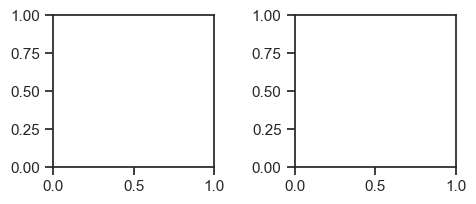

In [4]:
sns.set_theme(style='ticks')
fig,axes = plt.subplots(1,len(exps),figsize=(len(exps)*6.6*cm,5*cm))
plt.subplots_adjust(wspace=0.5)

for (exp,ax) in zip(exps,axes):
 
    sns.lineplot(data=SxN[(SxN.component.isin(['noise'])) & (
        SxN.exp == exp)], x='f', y='psd', legend=False, hue='subject', ax=ax)

    ax.set_title(label=exp)
    ax.set_xscale('log')
    
fig.savefig('../images/mainFig4/fig4e.png',dpi=400,bbox_inches='tight')
fig.savefig('../images/mainFig4/fig4e.svg',dpi=400,bbox_inches='tight')

In [211]:
aveSxN = SxN[(SxN.exp=='fullcontrast')&(SxN.f<49)&(SxN.f>2)].groupby(by=['exp','f','subject','tag','component'],as_index=False).mean()
aveSxN.head()

,exp,f,subject,tag,component,Unnamed: 0,label,psd
0,fullcontrast,2.2,S1,SSVEP,X,689.5,30.5,0.073535
1,fullcontrast,2.2,S1,SSVEP,noise,75689.5,30.5,0.059284
2,fullcontrast,2.2,S1,SSVEP,sig,38189.5,30.5,0.014250
3,fullcontrast,2.2,S10,SSVEP,X,689.5,30.5,0.308898
4,fullcontrast,2.2,S10,SSVEP,noise,75689.5,30.5,0.250175


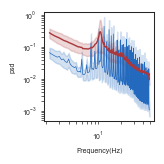

In [212]:
sns.set_theme(style='ticks', font='Arial', rc={"lines.linewidth": 0.75, 'font.size': 5, 'legend.fontsize': 5,'legend.title_fontsize': 5, 'axes.labelsize': 5, 'xtick.labelsize': 5, 'ytick.labelsize': 5, })

fig,ax = plt.subplots(figsize=(3.6*cm,3.6*cm))

sns.lineplot(data=aveSxN[(aveSxN.component.isin(['sig'])) & (
    aveSxN.exp == 'fullcontrast') & (aveSxN.tag == 'SSVEP')], x='f', y='psd', palette=[blue], legend=False, hue='tag', lw=0.5, ax=ax)

sns.lineplot(data=aveSxN[(aveSxN.component.isin(['noise'])) & (
    aveSxN.exp == 'fullcontrast') & (aveSxN.tag == 'SSVEP')], x='f', y='psd', palette=[red], legend=False, hue='tag', ax=ax,lw=1)

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='both')
    plt.setp(ax.spines.values(), linewidth=0.75)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel('Frequency(Hz)')
fig.savefig('../images/mainFig4/fig4e1.png',dpi=400,bbox_inches='tight')
fig.savefig('../images/mainFig4/fig4e1.svg',dpi=400,bbox_inches='tight')

### topo

In [68]:
SxN = []
add = '../results/range'
subs = os.listdir(add)


exps = ['benchmark']
for exp in exps:

    add = '../results/%s' % exp
    subs = os.listdir(add)

    for sub in subs:
        subFolder = add+os.sep+sub
        if os.path.exists(subFolder+os.sep+'scSxN.csv'):
            f = pd.read_csv(subFolder+os.sep+'scSxN.csv')
            SxN.append(f)

SxN = pd.concat(SxN, ignore_index=True).drop_duplicates()
SxN = SxN[SxN.f>2]
SxN.head()

,Unnamed: 0,label,f,psd,component,tag,channel,subject,exp
280,280,1,2.333333,3.605506,S,SSVEP,FP1,S34,benchmark
281,281,2,2.333333,0.766528,S,SSVEP,FP1,S34,benchmark
282,282,3,2.333333,1.028486,S,SSVEP,FP1,S34,benchmark
283,283,4,2.333333,0.233726,S,SSVEP,FP1,S34,benchmark
284,284,5,2.333333,-0.084455,S,SSVEP,FP1,S34,benchmark


In [127]:
aveSxN = SxN[~SxN.channel.isin(['CB1', 'CB2', 'M1', 'M2'])].groupby(by=['channel','component','f','subject'],as_index=False).mean()
aveSxN = aveSxN[(aveSxN.f>8)&(aveSxN.f<100)&(aveSxN.subject.isin(['S1']))].groupby(by=['channel','component','f'],as_index=False).mean()

aveSxN.head()

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_22325/2935647695.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aveSxN = SxN[~SxN.channel.isin(['CB1', 'CB2', 'M1', 'M2'])].groupby(by=['channel','component','f','subject'],as_index=False).mean()
/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_22325/2935647695.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aveSxN = aveSxN[(aveSxN.f>8)&(aveSxN.f<100)&(aveSxN.subject.isin(['S1']))].groupby(by=['channel','component','f'],as_index=False).mean()


,channel,component,f,Unnamed: 0,label,psd
0,AF3,N,8.333333,1006019.5,20.5,0.125311
1,AF3,N,8.666667,1006059.5,20.5,0.112299
2,AF3,N,9.000000,1006099.5,20.5,0.058116
3,AF3,N,9.333333,1006139.5,20.5,0.033935
4,AF3,N,9.666667,1006179.5,20.5,0.002397


<AxesSubplot: xlabel='f', ylabel='psd'>

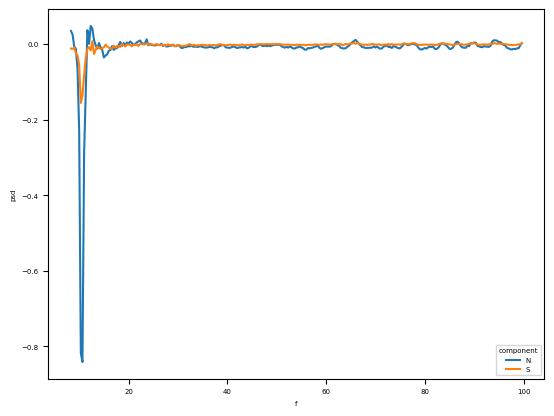

In [129]:
sns.lineplot(data=aveSxN[aveSxN.channel=='F4'],x='f',y='psd',hue='component')

In [130]:
chn = aveSxN[~aveSxN.channel.isin(
    ['CB1', 'CB2', 'M1', 'M2'])].channel.unique().tolist()

In [131]:
import mne
info = mne.create_info(ch_names=chn, sfreq=250,ch_types='eeg')
fname = 'montage.loc'
montage = mne.channels.read_custom_montage(fname)
info.set_montage(montage)

<Info | 8 non-empty values
 bads: []
 ch_names: AF3, AF4, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, CP5, CP6, ...
 chs: 60 EEG
 custom_ref_applied: False
 dig: 63 items (3 Cardinal, 60 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 60
 projs: []
 sfreq: 250.0 Hz
>

In [132]:
x = aveSxN[(aveSxN.component.isin(['S']))&(~aveSxN.channel.isin(['CB1', 'CB2', 'M1', 'M2']))].groupby(by='channel',as_index=False).sum()
y = aveSxN[(aveSxN.component.isin(['N']))&(~aveSxN.channel.isin(['CB1', 'CB2', 'M1', 'M2']))].groupby(by='channel',as_index=False).sum()

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_22325/2935746971.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = aveSxN[(aveSxN.component.isin(['S']))&(~aveSxN.channel.isin(['CB1', 'CB2', 'M1', 'M2']))].groupby(by='channel',as_index=False).sum()
/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_22325/2935746971.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = aveSxN[(aveSxN.component.isin(['N']))&(~aveSxN.channel.isin(['CB1', 'CB2', 'M1', 'M2']))].groupby(by='channel',as_index=False).sum()


In [133]:
x = x.psd.to_numpy()
y = y.psd.to_numpy()

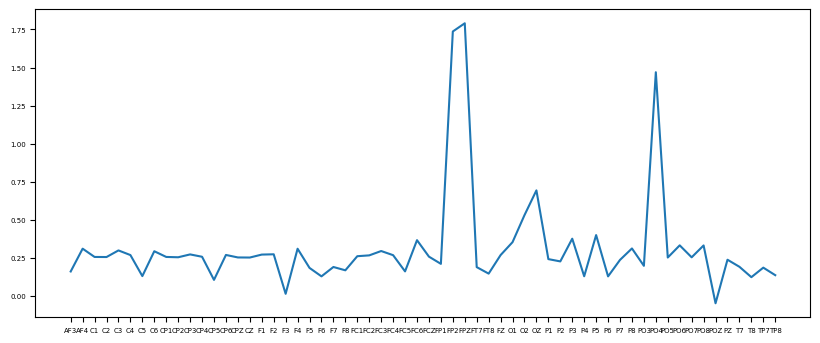

In [134]:
fig,ax = plt.subplots(figsize=(10,4))
plt.plot(chn,x/y)

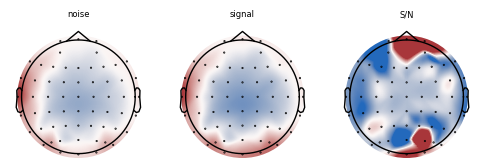

In [135]:
from mne.viz import plot_topomap
f,axes = plt.subplots(1,3,figsize=(6,2))

axes[0].set_title('noise')
axes[1].set_title('signal')
axes[2].set_title('S/N')

plot_topomap(data=y, pos=info,cmap='vlag',
                contours=0, show=False,axes=axes[0],)

plot_topomap(data=x, pos=info,cmap='vlag',
                contours=0, show=False,axes=axes[1],)

plot_topomap(data=x/y, pos=info,cmap='vlag',
                contours=0, show=False,axes=axes[2],vlim=[0.1,0.6])

plt.savefig('../images/mainFig4/fig4e2.png', dpi=400, bbox_inches='tight')
plt.savefig('../images/mainFig4/fig4e2.svg', dpi=400, bbox_inches='tight')

## (f) Scalp

In [141]:
scalp = []

exps = ['simuMEG','simuEEG']

for exp in exps:

    add = '../results/%s' % exp
    subs = os.listdir(add)

    for sub in subs:
        subFolder = add+os.sep+sub
        if os.path.exists(subFolder+os.sep+'SxN.csv'):
            f = pd.read_csv(subFolder+os.sep+'SxN.csv')
            scalp.append(f)

scalp = pd.concat(scalp, ignore_index=True, axis=0)
scalp["subject"] = scalp["subject"].str[2:]
aveScalp = scalp.groupby(by=['f','exp','tag','component'],as_index=False).mean()
aveScalp.tail()

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_98401/2511661336.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aveScalp = scalp.groupby(by=['f','exp','tag','component'],as_index=False).mean()


,f,exp,tag,component,Unnamed: 0,label,psd
745,124.0,simuEEG,SSVEP,noise,14979.5,20.5,6.754940e-16
746,124.0,simuEEG,SSVEP,sig,9979.5,20.5,6.804882e-17
747,124.0,simuMEG,SSVEP,X,4979.5,20.5,4.060981e-30
748,124.0,simuMEG,SSVEP,noise,14979.5,20.5,3.669865e-30
749,124.0,simuMEG,SSVEP,sig,9979.5,20.5,3.911151e-31


In [161]:
subList = ['Chenjingjing', 'Daibo', 'Wangdongbing', 'Huangfeixiang', 'Lixiang']
aveScalp = scalp[scalp.subject.isin(subList)].groupby(by=['exp','f','component','label'],as_index=False).mean()

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_98401/3495815355.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aveScalp = scalp[scalp.subject.isin(subList)].groupby(by=['exp','f','component','label'],as_index=False).mean()


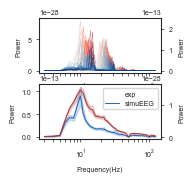

In [177]:
sns.set_theme(style='ticks', font='Arial', rc={"lines.linewidth": 0.75, 'font.size': 5, 'legend.fontsize': 5,
              'legend.title_fontsize': 5, 'axes.labelsize': 5, 'xtick.labelsize': 5, 'ytick.labelsize': 5, })

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(4*cm, 4*cm))

ax11 = ax1.twinx()
ax22 = ax2.twinx()

sns.lineplot(data=aveScalp[(aveScalp.f > 2) & (aveScalp.exp == 'simuEEG') & (
    aveScalp.component == 'sig')], x='f', y='psd', hue='label', ax=ax11, legend=False, palette='Blues', lw=0.2)

sns.lineplot(data=aveScalp[(aveScalp.f > 2) & (aveScalp.exp == 'simuMEG') & (
    aveScalp.component == 'sig')], x='f', y='psd', hue='label', ax=ax1, legend=False, palette='Reds', lw=0.2)


sns.lineplot(data=scalp[(scalp.f > 2) & (scalp.exp == 'simuEEG') & (scalp.component == 'noise') & (
    scalp.subject.isin(subList))], x='f', y='psd', hue='exp', ax=ax2, style='exp', legend=True, palette=[blue])

sns.lineplot(data=scalp[(scalp.f > 2) & (scalp.exp == 'simuMEG') & (scalp.component == 'noise') & (scalp.subject.isin(subList))], x='f', y='psd', hue='exp', ax=ax22, style='exp', legend=False, palette=[red])


ax2.set_ylabel('Information(bps)')

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='both')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.set_xscale('log')
    ax.set_xlabel('Frequency(Hz)')
    ax.set_ylabel('Power')


plt.savefig('../images/mainFig4/fig4f1.png',dpi=400,bbox_inches='tight')
plt.savefig('../images/mainFig4/fig4f1.svg',dpi=400,bbox_inches='tight')

In [193]:
scalp = []

exps = ['simuMEG','simuEEG']

for exp in exps:

    add = '../results/%s' % exp
    subs = os.listdir(add)

    for sub in subs:
        subFolder = add+os.sep+sub
        if os.path.exists(subFolder+os.sep+'NaB_info.csv'):
            f = pd.read_csv(subFolder+os.sep+'NaB_info.csv')
            scalp.append(f)

scalp = pd.concat(scalp, ignore_index=True, axis=0)
scalp["subject"] = scalp["subject"].str[2:]

aveScalp = scalp[scalp.subject.isin(subList)].groupby(by=['f','exp'],as_index=False).mean()
aveScalp.tail()

/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_98401/2347507222.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aveScalp = scalp[scalp.subject.isin(subList)].groupby(by=['f','exp'],as_index=False).mean()


,f,exp,Unnamed: 0,ubSNR,ubrate,sPower,nPower,X,ubINFO
245,122.0,simuMEG,122.0,0.112577,22.409202,3.842295e-31,3.788178e-30,4.172407e-30,22.436937
246,123.0,simuEEG,123.0,0.112976,13.952313,9.303249e-17,9.408026e-16,1.033835e-15,14.004806
247,123.0,simuMEG,123.0,0.094906,22.440577,3.352323e-31,3.682718e-30,4.017950e-30,22.436937
248,124.0,simuEEG,124.0,0.108351,14.004806,9.622957e-17,8.896044e-16,9.858340e-16,14.004806
249,124.0,simuMEG,124.0,0.107282,22.436937,3.725181e-31,3.705317e-30,4.077835e-30,22.436937


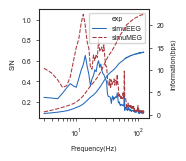

In [201]:
sns.set_theme(style='ticks', font='Arial', rc={"lines.linewidth": 0.75, 'font.size': 5, 'legend.fontsize': 5,
              'legend.title_fontsize': 5, 'axes.labelsize': 5, 'xtick.labelsize': 5, 'ytick.labelsize': 5, })

fig, (ax1) = plt.subplots(1, 1, figsize=(3.6*cm, 3.6*cm))


ax2 = ax1.twinx()
sns.lineplot(data=aveScalp[(aveScalp.f > 2)], x='f', y='ubSNR', hue='exp', ax=ax1, style='exp', legend=True, palette=[blue,red])

sns.lineplot(data=aveScalp[(aveScalp.f > 2)], x='f', y='ubrate',
             hue='exp', ax=ax2, style='exp', legend=False, palette=[blue, red])


ax1.set_ylabel('S/N')
ax2.set_ylabel('Information(bps)')

for ax in fig.axes:

    ax.tick_params(labelsize=5, width=0.5, length=2, which='both')
    plt.setp(ax.spines.values(), linewidth=0.75)
    ax.set_xscale('log')
    ax.set_xlabel('Frequency(Hz)')

plt.savefig('../images/mainFig4/fig4f2.png',dpi=400,bbox_inches='tight')
plt.savefig('../images/mainFig4/fig4f2.svg',dpi=400,bbox_inches='tight')